In [30]:
import pandas as pd 

import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv("/Users/alteafogh/Documents/ITU/AFAE/AFAE_Pokemon/pokemon_team_rocket_dataset.csv")

In [32]:
data = data.drop("Rare Item Holder", axis=1)
data = data.drop("Number of Migrations", axis=1)
data= data.drop("Is Pokemon Champion", axis=1)
data = data.drop("PokéBall Usage", axis = 1)
data = data.drop("ID", axis=1)


In [33]:
data = data.drop("Most Used Pokemon Type", axis = 1)
data = data.drop("Battle Strategy",axis = 1)


In [34]:
data = data.drop("Number of Gym Badges", axis=1)

In [35]:
data

,Age,City,Economic Status,Profession,Average Pokemon Level,Criminal Record,Win Ratio,Debt to Kanto,Charity Participation,Team Rocket
0,27,Pewter City,Middle,Fisherman,50,0,51,24511,True,No
1,55,Viridian City,Middle,PokéMart Seller,35,1,53,177516,True,Yes
2,14,Pallet Town,High,Police Officer,96,0,76,85695,True,No
3,41,Cerulean City,Middle,Gym Leader Assistant,23,0,27,39739,True,No
4,15,Pallet Town,Middle,Gym Leader Assistant,16,1,51,126923,False,Yes
...,...,...,...,...,...,...,...,...,...,...
4995,36,Viridian City,Middle,Researcher,91,0,53,70192,True,NaN
4996,17,Vermilion City,Middle,Gym Leader Assistant,23,0,40,43208,True,NaN
4997,67,Fuchsia City,High,Elite Trainer,13,0,36,47794,True,NaN
4998,43,Viridian City,Middle,Daycare Worker,48,0,51,10995,True,NaN


In [37]:
data.loc[(data['Criminal Record'] == 1) & (data['Team Rocket'].isna()), 'Team Rocket'] = 'Yes'

In [38]:
data["Team Rocket"].value_counts()

No     3280
Yes     775
Name: Team Rocket, dtype: int64

In [ ]:
print(data["Economic Status"].value_counts())
print("could be an analys of how the different factors influence the economic status (maybe only low and middle)\n")
print(data["City"].value_counts())
print("having some sort of north/ south division")
print(data["Criminal Record"].value_counts())
print("a contributing factor")
print(data["Is Pokemon Champion"].value_counts())
print("contributing factor")
print(data["Profession"].value_counts())
print("pretty evenly distributed, so another contributing factor")
print(data["Most Used Pokemon Type"].value_counts())


Middle    2448
Low       1797
High       755
Name: Economic Status, dtype: int64
could be an analys of how the different factors influence the economic status (maybe only low and middle)

Vermilion City     549
Pallet Town        527
Cerulean City      522
Lavender Town      512
Fuchsia City       511
Saffron City       502
Viridian City      485
Celadon City       475
Pewter City        474
Cinnabar Island    443
Name: City, dtype: int64
having some sort of north/ south division
0    4585
1     415
Name: Criminal Record, dtype: int64
a contributing factor
False    4913
True       87
Name: Is Pokemon Champion, dtype: int64
contributing factor
Breeder                 343
Biker                   334
PokéMart Seller         326
Scientist               323
Casino Worker           320
Police Officer          316
Elite Trainer           316
Champion                316
Gym Leader Assistant    314
Daycare Worker          310
Nurse                   307
Underground Battler     305
Rocket Grunt 

sketcky : Biker, Underground Battler , Rocket Grunt , Black Market Dealer

nice : breeder, PokéMart Seller, scientist, Casino worker, Police Officer, Elite Trainer , Champion                316
Gym Leader Assistant    314
Daycare Worker          310
Nurse 
Researcher, Fisherman 



qualification: breeder, scientist, Police Officer, Elite Trainer  , Champion Gym Leader Assistant  Daycare Worker   Nurse Researcher



non qualification: biker, pokemart seller , casino worker, Underground Battler , Rocket Grunt , Black Market Dealer, Fisherman 

In [46]:


# Define job categories
nice_jobs = [
    'Breeder', 'PokéMart Seller', 'Scientist', 'Casino Worker', 'Police Officer',
    'Elite Trainer', 'Champion', 'Gym Leader Assistant', 'Daycare Worker',
    'Nurse', 'Researcher', 'Fisherman'
]

sketchy_jobs = [
    'Biker', 'Underground Battler', 'Rocket Grunt', 'Black Market Dealer'
]

qualified_jobs = [
    'Breeder', 'Scientist', 'Police Officer', 'Elite Trainer', 'Champion',
    'Gym Leader Assistant', 'Daycare Worker', 'Nurse', 'Researcher'
]

non_qualified_jobs = [
    'Biker', 'Pokemart Seller', 'Casino Worker', 'Underground Battler',
    'Rocket Grunt', 'Black Market Dealer', 'Fisherman'
]


# Add "nice" column
data['Nice'] = data['Profession'].apply(
    lambda x: 1 if x in nice_jobs else (0 if x in sketchy_jobs else 0)
)

# Add "qualified" column
data['Qualified'] = data['Profession'].apply(
    lambda x: 1 if x in qualified_jobs else (0 if x in non_qualified_jobs else 0)
)




In [50]:
data = data.drop("Profession", axis=1)

In [51]:
data

,Age,City,Economic Status,Average Pokemon Level,Criminal Record,Win Ratio,Debt to Kanto,Charity Participation,Team Rocket,Nice,Qualified
0,27,Pewter City,Middle,50,0,51,24511,True,No,1,0
1,55,Viridian City,Middle,35,1,53,177516,True,Yes,1,0
2,14,Pallet Town,High,96,0,76,85695,True,No,1,1
3,41,Cerulean City,Middle,23,0,27,39739,True,No,1,1
4,15,Pallet Town,Middle,16,1,51,126923,False,Yes,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,36,Viridian City,Middle,91,0,53,70192,True,NaN,1,1
4996,17,Vermilion City,Middle,23,0,40,43208,True,NaN,1,1
4997,67,Fuchsia City,High,13,0,36,47794,True,NaN,1,1
4998,43,Viridian City,Middle,48,0,51,10995,True,NaN,1,1


In [54]:
data["Charity Participation"] = data["Charity Participation"].astype(int)

data["Team Rocket"] = data["Team Rocket"].map({"Yes":1, "No":0})

In [55]:

data_train = data[data['Team Rocket'].notnull()].copy()



In [56]:
data_train.to_csv("pokemon_data.csv")

Distribución de la variable objetivo 'Team Rocket':
No     3280
Yes     720
Name: Team Rocket, dtype: int64


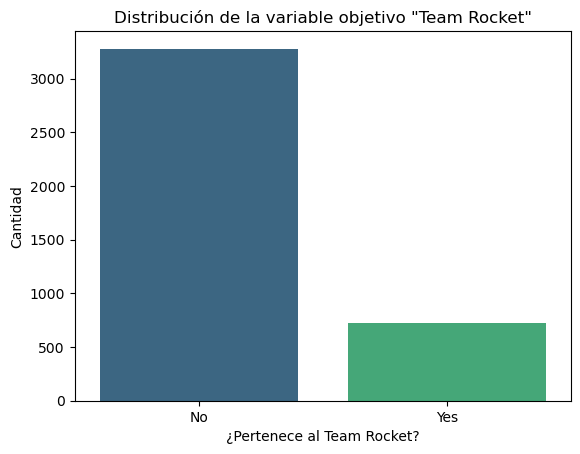

In [40]:
print("Distribución de la variable objetivo 'Team Rocket':")
print(data_train['Team Rocket'].value_counts())

# Visualizo rápidamente esta distribución
sns.countplot(x='Team Rocket', data=data_train, palette='viridis')
plt.title('Distribución de la variable objetivo "Team Rocket"')
plt.ylabel('Cantidad')
plt.xlabel('¿Pertenece al Team Rocket?')
plt.show()

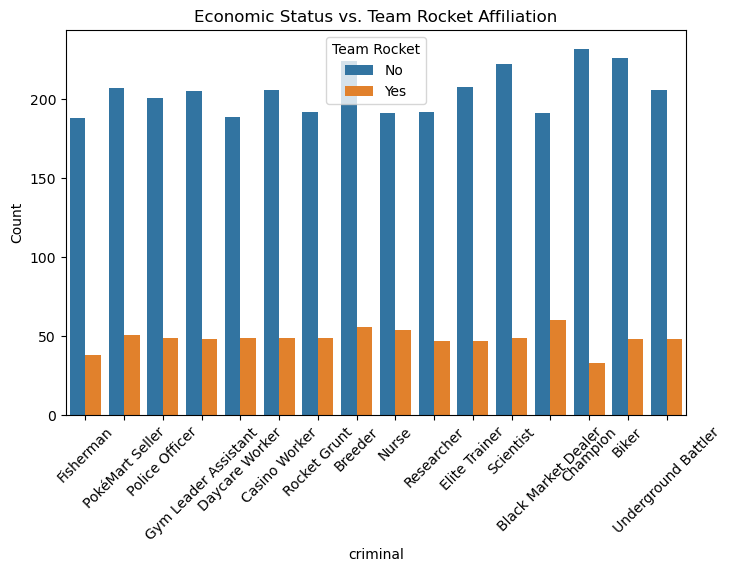

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Profession', hue='Team Rocket', data=data)
plt.title('Economic Status vs. Team Rocket Affiliation')
plt.xlabel('criminal')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


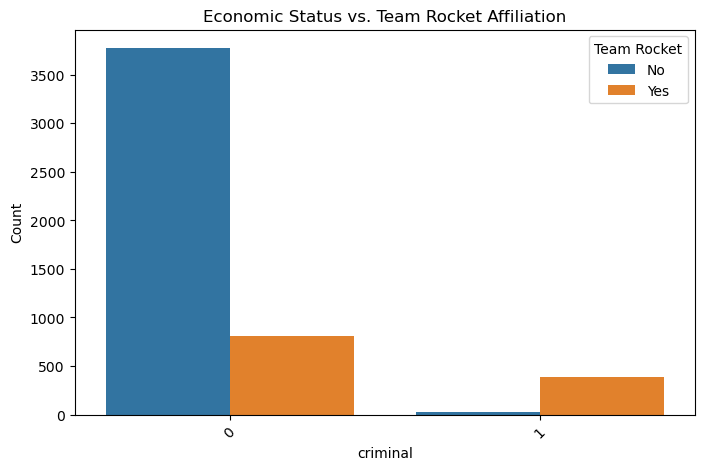

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Criminal Record', hue='Team Rocket', data=data)
plt.title('Economic Status vs. Team Rocket Affiliation')
plt.xlabel('criminal')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# if you are in a criminal, then yopu are in team rocket. if you are in team rocket, it doesnt mean you are a criminal

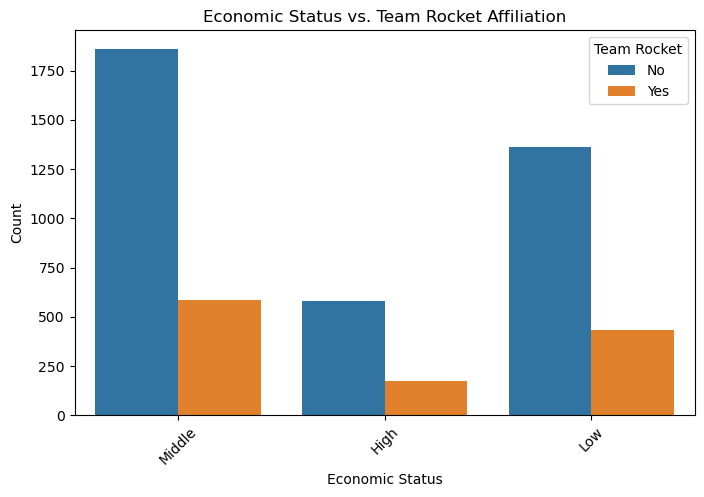

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Economic Status', hue='Team Rocket', data=data)
plt.title('Economic Status vs. Team Rocket Affiliation')
plt.xlabel('Economic Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Count'>

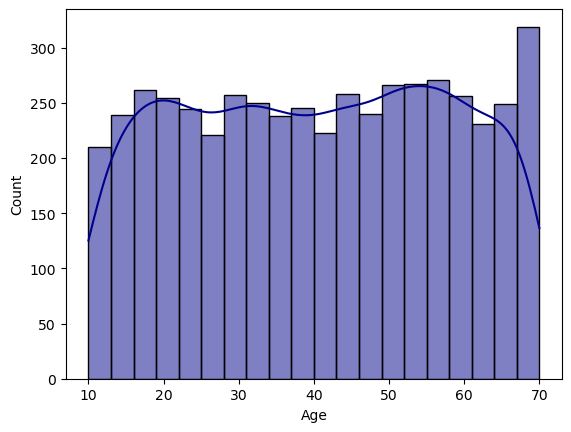

In [17]:
sns.histplot(data['Age'], bins=20, kde=True, color='darkblue')

In [58]:
data["Debt"] = data["Debt to Kanto"] > 100000

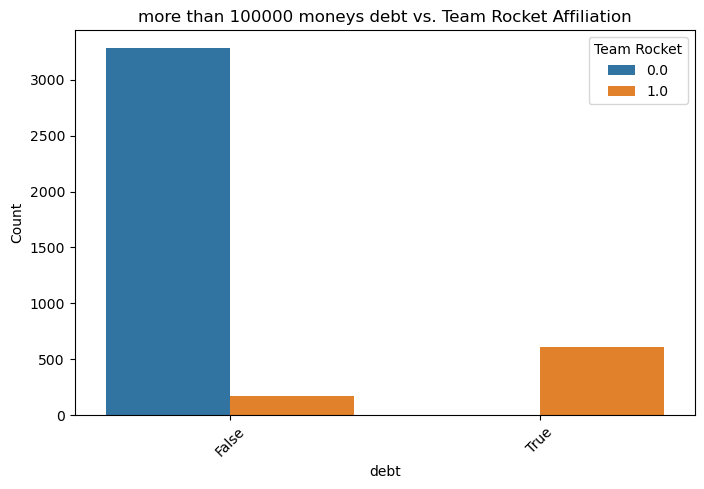

In [60]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Debt', hue='Team Rocket', data=data)
plt.title('more than 100000 moneys debt vs. Team Rocket Affiliation')
plt.xlabel('debt')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot: xlabel='Debt to Kanto', ylabel='Count'>

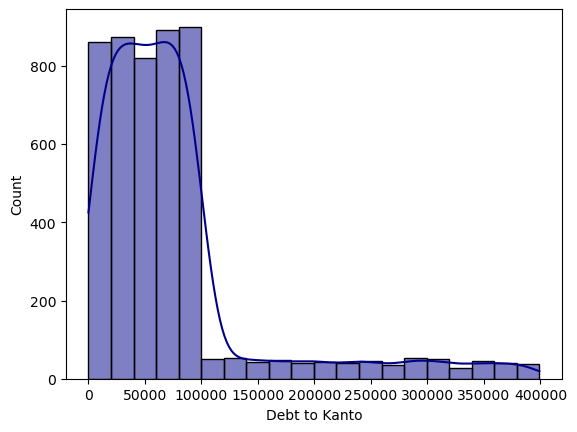

In [18]:
sns.histplot(data['Debt to Kanto'], bins=20, kde=True, color='darkblue')

<AxesSubplot: xlabel='Average Pokemon Level', ylabel='Count'>

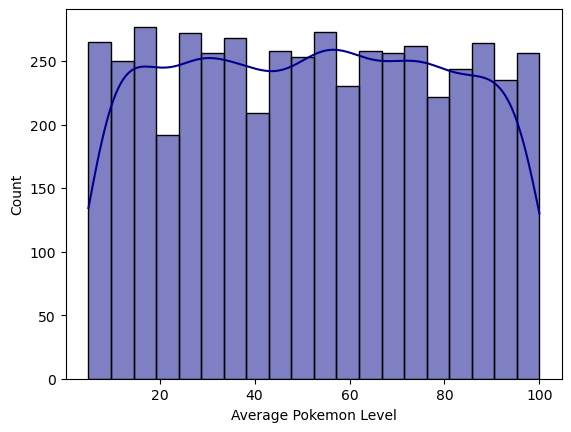

In [19]:
sns.histplot(data['Average Pokemon Level'], bins=20, kde=True, color='darkblue')